In [13]:
# Dados previsão Apple 
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", 
             "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

               

,Date,Open,High,Low,Close,Adj Close,Volume
3444,2022-10-28,148.199997,157.500000,147.820007,155.740005,155.740005,164762400
3445,2022-10-31,153.160004,154.240005,151.919998,153.339996,153.339996,97943200
3446,2022-11-01,155.080002,155.449997,149.130005,150.649994,150.649994,80379300
3447,2022-11-02,148.949997,152.169998,145.000000,145.029999,145.029999,93604600
3448,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.880005,97918500


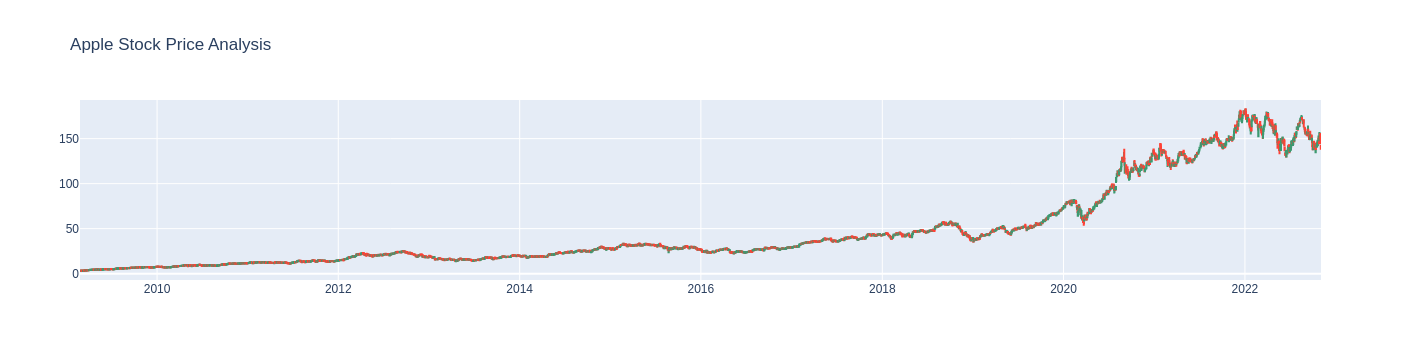

In [14]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [4]:
# Dados previsão Apple 
# import pandas as pd
# import yfinance as yf
# import datetime
# from datetime import date, timedelta
# today = date.today()

# d1 = today.strftime("%Y-%m-%d")
# end_date = d1
# d2 = date.today() - timedelta(days=5000)
# d2 = d2.strftime("%Y-%m-%d")
# start_date = d2

# data = yf.download('TSLA', 
#                       start=start_date, 
#                       end=end_date, 
#                       progress=False)
# data["Date"] = data.index
# data = data[["Date", "Open", "High", "Low", "Close", 
#              "Adj Close", "Volume"]]
# data.reset_index(drop=True, inplace=True)
# data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3106,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
3107,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
3108,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
3109,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300
3110,2022-11-03,211.360001,221.199997,210.139999,215.309998,215.309998,56538800


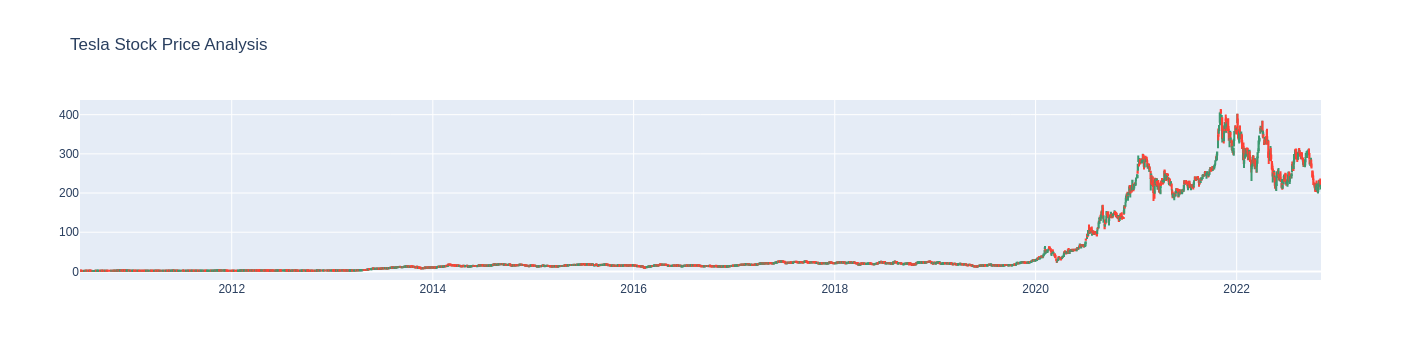

In [6]:
# import plotly.graph_objects as go
# figure = go.Figure(data=[go.Candlestick(x=data["Date"],
#                                         open=data["Open"], 
#                                         high=data["High"],
#                                         low=data["Low"], 
#                                         close=data["Close"])])
# figure.update_layout(title = "Tesla Stock Price Analysis", 
#                      xaxis_rangeslider_visible=False)
# figure.show()

In [7]:
# import pandas as pd
# import yfinance as yf
# import datetime
# from datetime import date, timedelta
# today = date.today()

# d1 = today.strftime("%Y-%m-%d")
# end_date = d1
# d2 = date.today() - timedelta(days=5000)
# d2 = d2.strftime("%Y-%m-%d")
# start_date = d2

# data = yf.download('AMZN', 
#                       start=start_date, 
#                       end=end_date, 
#                       progress=False)
# data["Date"] = data.index
# data = data[["Date", "Open", "High", "Low", "Close", 
#              "Adj Close", "Volume"]]
# data.reset_index(drop=True, inplace=True)
# data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3444,2022-10-28,97.910004,103.959999,97.660004,103.410004,103.410004,223133400
3445,2022-10-31,103.559998,104.870003,100.739998,102.440002,102.440002,99251400
3446,2022-11-01,103.989998,104.580002,96.059998,96.790001,96.790001,153370000
3447,2022-11-02,97.320000,97.739998,92.010002,92.120003,92.120003,135761800
3448,2022-11-03,92.470001,93.500000,89.019997,89.300003,89.300003,136683300


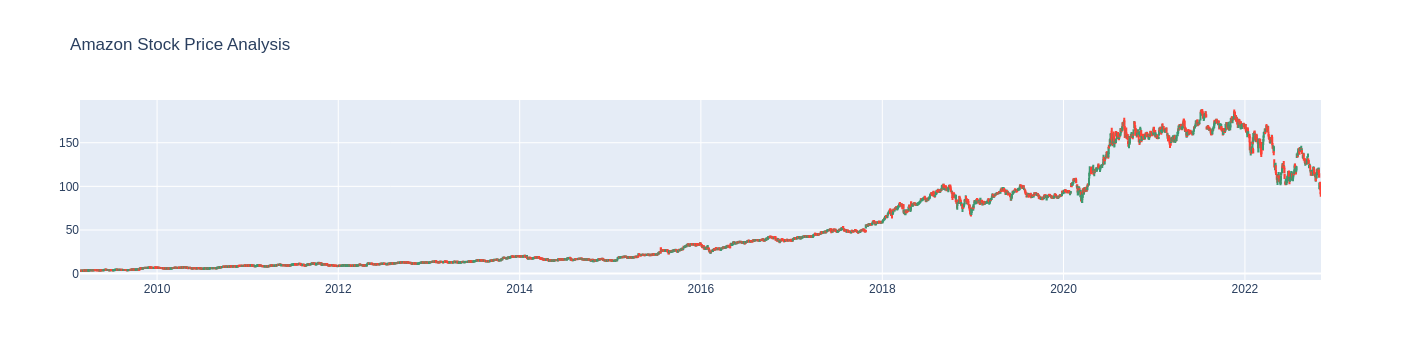

In [9]:
# import plotly.graph_objects as go
# figure = go.Figure(data=[go.Candlestick(x=data["Date"],
#                                         open=data["Open"], 
#                                         high=data["High"],
#                                         low=data["Low"], 
#                                         close=data["Close"])])
# figure.update_layout(title = "Amazon Stock Price Analysis", 
#                      xaxis_rangeslider_visible=False)
# figure.show()

In [15]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999916
Low          0.999879
High         0.999873
Open         0.999735
Volume      -0.518668
Name: Close, dtype: float64


/tmp/ipykernel_18931/2923706208.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [21]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

2022-11-04 21:34:46.299282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 21:34:46.436455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 21:34:46.436473: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-04 21:34:46.463680: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-04 21:34:47.050520: W tensorflow/stream_executor/platform/de

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2759/2759 [==============================] - 10s 3ms/step - loss: 225.6481
Epoch 2/30
2759/2759 [==============================] - 8s 3ms/step - loss: 11.8415
Epoch 3/30
2759/2759 [==============================] - 8s 3ms/step - loss: 10.0719
Epoch 4/30
2759/2759 [==============================] - 8s 3ms/step - loss: 8.9212
Epoch 5/30
2759/2759 [==============================] - 8s 3ms/step - loss: 7.4199
Epoch 6/30
2759/2759 [==============================] - 9s 3ms/step - loss: 6.9130
Epoch 7/30
2759/2759 [==============================] - 8s 3ms/step - loss: 7.2340
Epoch 8/30
2759/2759 [==============================] - 8s 3ms/step - loss: 6.3022
Epoch 9/30
2759/2759 [==============================] - 8s 3ms/step - loss: 8.6797
Epoch 10/30
2759/2759 [==============================] - 8s 3ms/step - loss: 6.6443
Epoch 11/30
2759/2759 [==============================] - 9s 3ms/step - loss: 5.2849
Epoch 12/30
2759/2759 [==============================] - 8s 3ms/step - loss: 5.0

In [27]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 [==============================] - 1s 656ms/step


array([[174.87802]], dtype=float32)